In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date, time, datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from hdbcli import dbapi as db

from statsmodels.tsa.api import STLForecast, ExponentialSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score

from statsmodels.tsa.api import STLForecast, ExponentialSmoothing, ETSModel

import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from pmdarima.arima import auto_arima
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA


import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from openpyxl import Workbook

import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from openpyxl import Workbook

from dateutil.relativedelta import relativedelta

In [2]:
conn = db.connect(address='10.0.0.110', port='30015', user='DESARROLLO', password='DevHermeco.2022')
cursor = conn.cursor()
sql = '''SELECT "AÑO","Año de Venta","FECHA VENTA","SEMANA","Sublínea","MATERIAL","Descrip. Material","AFS: COLOR", "AFS: TALLA","Edad","Género","Grupo de Artículo","Tipo de Artículo","Tipo de Tejido","Mundo", "REGIÓN", "Ciudad"
FROM HEP300.VW_CD_REPORTE_VENTAS_ALL_2016 \
WHERE(CANAL = 'FRANQUICIAS' OR CANAL = 'TIENDAS PROPIAS') 
AND "Marca" = 'OFFCORSS'
AND "AÑO" >= 2016
'''
df_canal = pd.read_sql_query(sql, conn)
df_canal.to_parquet('Long_data_2016_11pm.parquet')

In [ ]:
df_canal

In [4]:
df_canal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906960 entries, 0 to 12906959
Data columns (total 14 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   AÑO                int64 
 1   Año de Venta       object
 2   FECHA VENTA        object
 3   SEMANA             int64 
 4   AFS: COLOR         object
 5   AFS: TALLA         object
 6   Edad               object
 7   Género             object
 8   Grupo de Artículo  object
 9   Tipo de Artículo   object
 10  Tipo de Tejido     object
 11  Mundo              object
 12  REGIÓN             object
 13  Ciudad             object
dtypes: int64(2), object(12)
memory usage: 1.3+ GB


In [5]:
for column in df_canal.columns:
    q = len(df_canal[column].unique())
    print(column, q)

AÑO 8
Año de Venta 16
FECHA VENTA 2652
SEMANA 53
AFS: COLOR 1197
AFS: TALLA 81
Edad 6
Género 6
Grupo de Artículo 33
Tipo de Artículo 180
Tipo de Tejido 5
Mundo 8
REGIÓN 34
Ciudad 46


In [12]:
print(len(df_canal[df_canal['Mundo'] == 'OTROS']))
print(len(df_canal[df_canal['Género'] == '']))
print(len(df_canal[df_canal['Mundo'] == 'OTROS'][df_canal['Género'] == '']))

316624
207
207


In [15]:
df_canal['Tipo de Artículo'].unique()

array(['PANTALON', 'VESTIDO MANGA SISA', 'LEGGINGS',
       'VESTIDO MANGA CORTA', 'SHORT', 'CAMISA MANGA LARGA', 'TENIS',
       'CHAQUETA', 'SUDADERA', 'BERMUDA', 'BUZO', 'CAMISETA MANGA CORTA',
       'OVERALL LARGO', 'PAÑALERA', 'FULAR', 'PANTALONETA', 'PAÑOLETA',
       'INFERIOR', 'CAMISETA POLO', 'CORREA', 'CONJUNTO CORTO', 'BUFANDA',
       'GUANTES', 'BODY MANGA CORTA', 'SANDALIA', 'CAMISA MANGA CORTA',
       'ZAPATOS PRECAMINADOR', 'ZAPATOS COSIDOS', 'CONJUNTO LARGO',
       'ENTERIZO CORTO', 'GORRO', 'CAMISETA MANGA LARGA', 'BOMBACHO',
       'CHALECO', 'MORRAL', 'BOTAS', 'KIMONO', 'CAÑA CORTA',
       'SALIDA DE BAÑO', 'MINIFALDA', 'ARETAS', 'BALETA',
       'CONJUNTO SUDADERA', 'SOMBRERO', 'ZAPATO', 'BIKINI',
       'VESTIDO ENTERO', 'TANKINI', 'SET', 'CAMISA MANGA SISA',
       'GORRO DE BAÑO', 'PIJAMA MC-PC', 'CAMISETA MANGA SISA', 'TOALLA',
       'CUIDADO PERSONAL', 'CACHUCHA', 'PULSERA', 'BOXER', 'OTROS',
       'VISERA', 'TAPABOCAS', 'CAMISETA ESQUELETO', 'PIJAMA BA

In [14]:
df_canal['Grupo de Artículo'].unique()

array(['PANTALON LARGO', 'VESTIDO', 'PANTALON CORTO', 'CAMISA', 'CALZADO',
       'BUZO O CHAQUETA', 'CAMISETA', 'OVERALL', 'ACCESORIO', 'PIJAMA',
       'CONJUNTO', 'BODY', 'ENTERIZO EXTERIOR', 'SOMBRERO', 'MEDIAS',
       'ROPA DE BAÑO', 'FALDA', 'SET', 'TAPABOCAS', 'TOP', 'PANTY',
       'COBIJA', 'PANTALONCILLO', 'SABANA', 'CUIDADO PERSONAL',
       'ROPA HOGAR', 'TOP INTERIOR', 'DENIM', 'MISCELÁNEOS',
       'TENDIDO DE CAMA', '', 'HOGAR ACCESORIOS', 'JUEGO SÁBANAS'],
      dtype=object)

In [16]:
df_canal[df_canal['Grupo de Artículo'] == '']

,AÑO,Año de Venta,FECHA VENTA,SEMANA,AFS: COLOR,AFS: TALLA,Edad,Género,Grupo de Artículo,Tipo de Artículo,Tipo de Tejido,Mundo,REGIÓN,Ciudad
2442070,2022,2022,2022-07-20,30,Rosado 12-1310,TU,,,,,,OTROS,CUNDINAMARCA,MOSQUERA
2442071,2022,2022,2022-08-12,33,Rosado 12-1310,TU,,,,,,OTROS,ANTIOQUIA,MEDELLIN
2442072,2022,2022,2022-07-30,31,Rosado 12-1310,TU,,,,,,OTROS,ANTIOQUIA,RIONEGRO
2442073,2022,2022,2022-07-26,31,Rosado 12-1310,TU,,,,,,OTROS,VALLE,CALI
2442074,2022,2022,2022-08-08,33,Rosado 12-1310,TU,,,,,,OTROS,ANTIOQUIA,MEDELLIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189236,2022,2022,2022-08-14,33,Morado 17-3020,TU,,,,,,OTROS,TOLIMA,CALI
5189237,2022,2022,2022-08-17,34,Morado 17-3020,TU,,,,,,OTROS,META,VILLAVICENCIO
5189238,2022,2022,2022-07-24,30,Morado 17-3020,TU,,,,,,OTROS,CUNDINAMARCA,CHIA
5189239,2022,2022,2022-07-30,31,Morado 17-3020,TU,,,,,,OTROS,CUNDINAMARCA,CHIA


In [ ]:
df_canal[df_canal['Mundo'] == 'OTROS'][df_canal['Género'] != ''  ]

In [13]:
df_canal[df_canal['Mundo'] == 'OTROS'][df_canal['Género'] != ''  ]

,AÑO,Año de Venta,FECHA VENTA,SEMANA,AFS: COLOR,AFS: TALLA,Edad,Género,Grupo de Artículo,Tipo de Artículo,Tipo de Tejido,Mundo,REGIÓN,Ciudad
18037,2020,2018,2020-06-11,24,Verde 18-0316,TU,PRIMI,UNISEX,ACCESORIO,PAÑALERA,TEJIDO PLANO,OTROS,SANTANDER,BUCARAMANGA
18038,2020,2018,2020-02-07,6,Verde 18-0316,TU,PRIMI,UNISEX,ACCESORIO,PAÑALERA,TEJIDO PLANO,OTROS,ATLÁNTICO,BARRANQUILLA
18039,2019,2018,2019-12-29,52,Verde 18-0316,TU,PRIMI,UNISEX,ACCESORIO,PAÑALERA,TEJIDO PLANO,OTROS,BOLÍVAR,CARTAGENA
18040,2020,2018,2020-03-14,11,Verde 18-0316,TU,PRIMI,UNISEX,ACCESORIO,PAÑALERA,TEJIDO PLANO,OTROS,NORTE SANTANDER,CUCUTA
18041,2020,2018,2020-03-09,11,Verde 18-0316,TU,PRIMI,UNISEX,ACCESORIO,PAÑALERA,TEJIDO PLANO,OTROS,NARIÑO,IPIALES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570391,2023,2023,2023-04-22,17,Gris Jaspe,XS,NIÑOS,UNISEX,SOMBRERO,GORRO,TEJIDO PUNTO,OTROS,BOGOTÁ,BOGOTÁ
12570392,2023,2023,2023-04-22,17,Gris Jaspe,XS,NIÑOS,UNISEX,SOMBRERO,GORRO,TEJIDO PUNTO,OTROS,BOGOTÁ,BOGOTÁ
12570393,2023,2023,2023-04-22,17,Gris Jaspe,XS,NIÑOS,UNISEX,SOMBRERO,GORRO,TEJIDO PUNTO,OTROS,BOGOTÁ,BOGOTÁ
12570394,2023,2023,2023-04-27,18,Gris Jaspe,XS,NIÑOS,UNISEX,SOMBRERO,GORRO,TEJIDO PUNTO,OTROS,BOGOTÁ,BOGOTÁ


In [8]:
df_canal['UNIDADES'] = 1

In [10]:
time_series = df_canal.groupby('FECHA VENTA')['UNIDADES'].sum()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


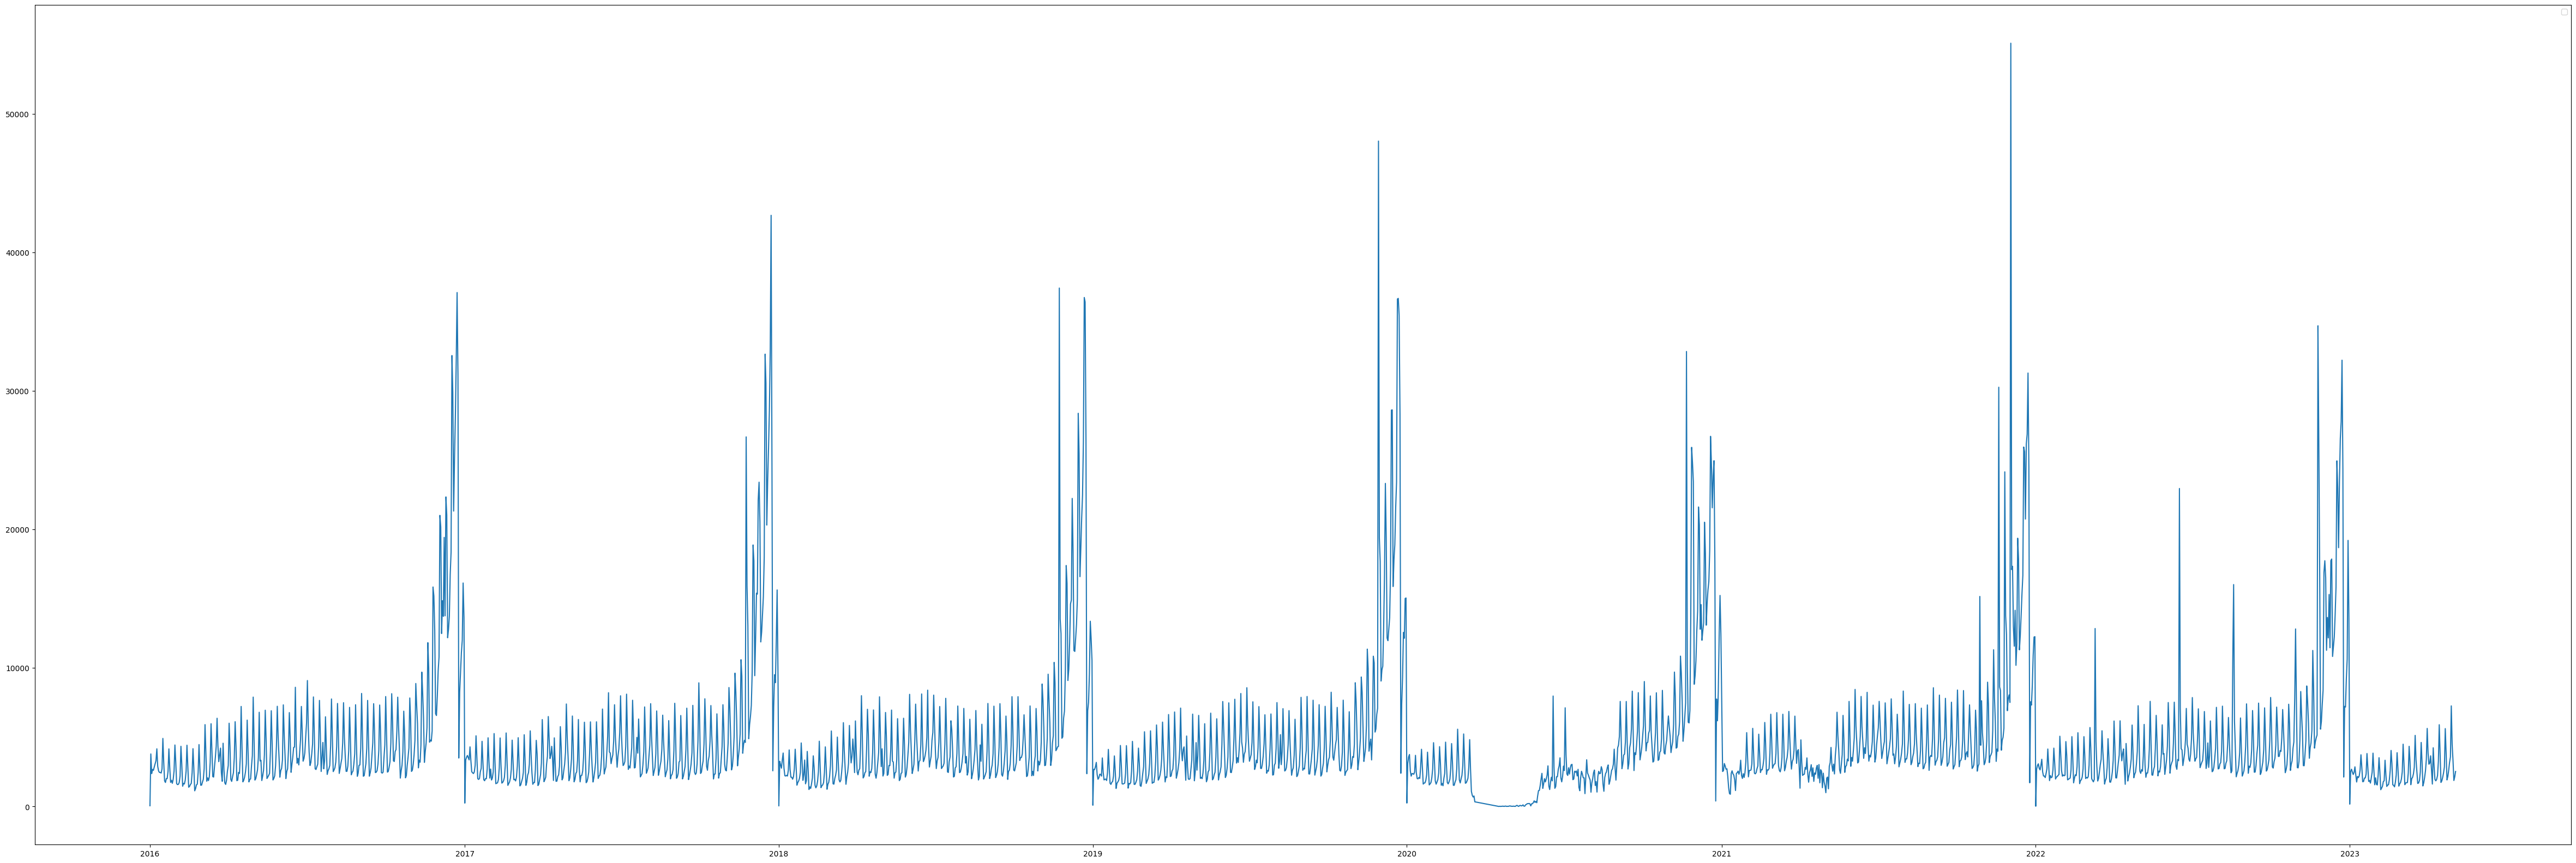

In [27]:
plt.figure(figsize=(60, 20))
plt.legend()
plt.plot(time_series)


In [20]:
tabla_pivote = df_canal.groupby(['FECHA VENTA', 'Grupo de Artículo']).size().reset_index(name='count').pivot(index='FECHA VENTA', columns='Grupo de Artículo', values='count')

In [26]:
tabla_pivote

Grupo de Artículo,,ACCESORIO,BODY,BUZO O CHAQUETA,CALZADO,CAMISA,CAMISETA,COBIJA,CONJUNTO,CUIDADO PERSONAL,...,ROPA DE BAÑO,ROPA HOGAR,SABANA,SET,SOMBRERO,TAPABOCAS,TENDIDO DE CAMA,TOP,TOP INTERIOR,VESTIDO
FECHA VENTA,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,3.0,6.0,5.0,5.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
2016-01-02,NaN,82.0,81.0,262.0,379.0,291.0,937.0,1.0,132.0,NaN,...,55.0,NaN,NaN,102.0,8.0,NaN,NaN,NaN,NaN,225.0
2016-01-03,NaN,61.0,52.0,149.0,196.0,151.0,651.0,NaN,90.0,NaN,...,38.0,NaN,NaN,62.0,11.0,NaN,NaN,NaN,NaN,119.0
2016-01-04,NaN,72.0,44.0,180.0,227.0,177.0,675.0,1.0,89.0,NaN,...,44.0,NaN,NaN,60.0,5.0,NaN,NaN,NaN,1.0,163.0
2016-01-05,NaN,83.0,35.0,133.0,220.0,184.0,705.0,1.0,91.0,NaN,...,47.0,NaN,NaN,43.0,10.0,NaN,NaN,NaN,9.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,NaN,62.0,118.0,532.0,389.0,98.0,915.0,6.0,613.0,154.0,...,63.0,11.0,NaN,195.0,1.0,NaN,NaN,2.0,10.0,108.0
2023-05-01,NaN,63.0,81.0,363.0,287.0,77.0,679.0,5.0,440.0,124.0,...,42.0,15.0,NaN,172.0,1.0,NaN,NaN,2.0,6.0,69.0
2023-05-02,NaN,22.0,65.0,157.0,152.0,45.0,400.0,3.0,259.0,52.0,...,26.0,5.0,NaN,111.0,NaN,NaN,NaN,3.0,NaN,62.0


Error in callback <function _draw_all_if_interactive at 0x00000254DC8722A0> (for post_execute):


MemoryError: In RendererAgg: Out of memory

<Figure size 30000x8000 with 0 Axes>

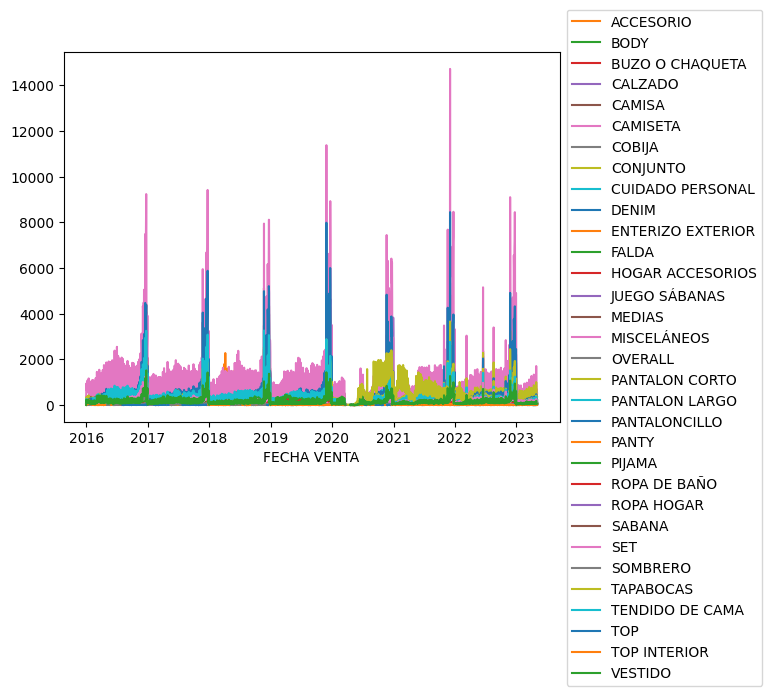

In [49]:
subset = ['', 'ACCESORIO', 'BODY', 'BUZO O CHAQUETA', 'CALZADO', 'CAMISA',
       'CAMISETA', 'COBIJA', 'CONJUNTO', 'CUIDADO PERSONAL', 'DENIM',
       'ENTERIZO EXTERIOR', 'FALDA', 'HOGAR ACCESORIOS', 'JUEGO SÁBANAS',
       'MEDIAS', 'MISCELÁNEOS', 'OVERALL', 'PANTALON CORTO', 'PANTALON LARGO',
       'PANTALONCILLO', 'PANTY', 'PIJAMA', 'ROPA DE BAÑO', 'ROPA HOGAR',
       'SABANA', 'SET', 'SOMBRERO', 'TAPABOCAS', 'TENDIDO DE CAMA', 'TOP',
       'TOP INTERIOR', 'VESTIDO']
plt.figure(figsize=(300, 80))
ax = tabla_pivote[subset].plot()
ax.legend(loc="center left", bbox_to_anchor=(1, 0.2))

In [37]:
tabla_pivote.columns

Index(['', 'ACCESORIO', 'BODY', 'BUZO O CHAQUETA', 'CALZADO', 'CAMISA',
       'CAMISETA', 'COBIJA', 'CONJUNTO', 'CUIDADO PERSONAL', 'DENIM',
       'ENTERIZO EXTERIOR', 'FALDA', 'HOGAR ACCESORIOS', 'JUEGO SÁBANAS',
       'MEDIAS', 'MISCELÁNEOS', 'OVERALL', 'PANTALON CORTO', 'PANTALON LARGO',
       'PANTALONCILLO', 'PANTY', 'PIJAMA', 'ROPA DE BAÑO', 'ROPA HOGAR',
       'SABANA', 'SET', 'SOMBRERO', 'TAPABOCAS', 'TENDIDO DE CAMA', 'TOP',
       'TOP INTERIOR', 'VESTIDO'],
      dtype='object', name='Grupo de Artículo')

<Figure size 20000x8000 with 0 Axes>

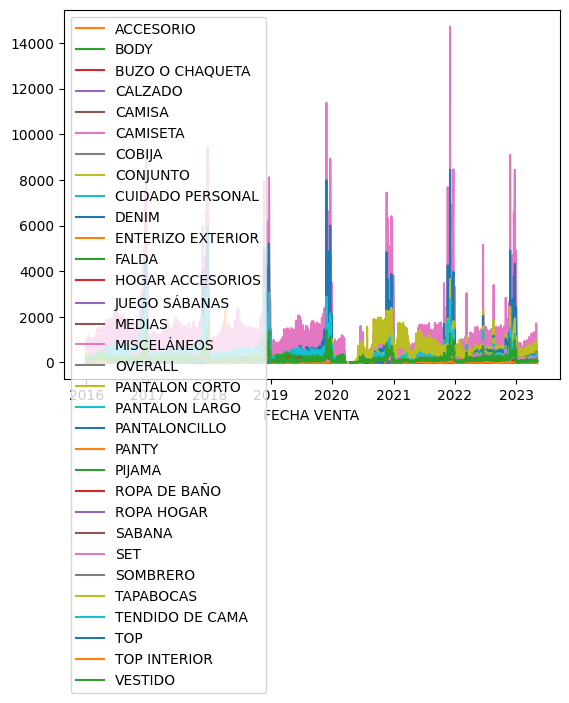

In [36]:
plt.figure(figsize=(200, 80))
tabla_pivote.plot()
plt.legend()
# plt.plot(tabla_pivote)
plt.show()


In [24]:
counts = df_canal['FECHA VENTA'].value_counts()

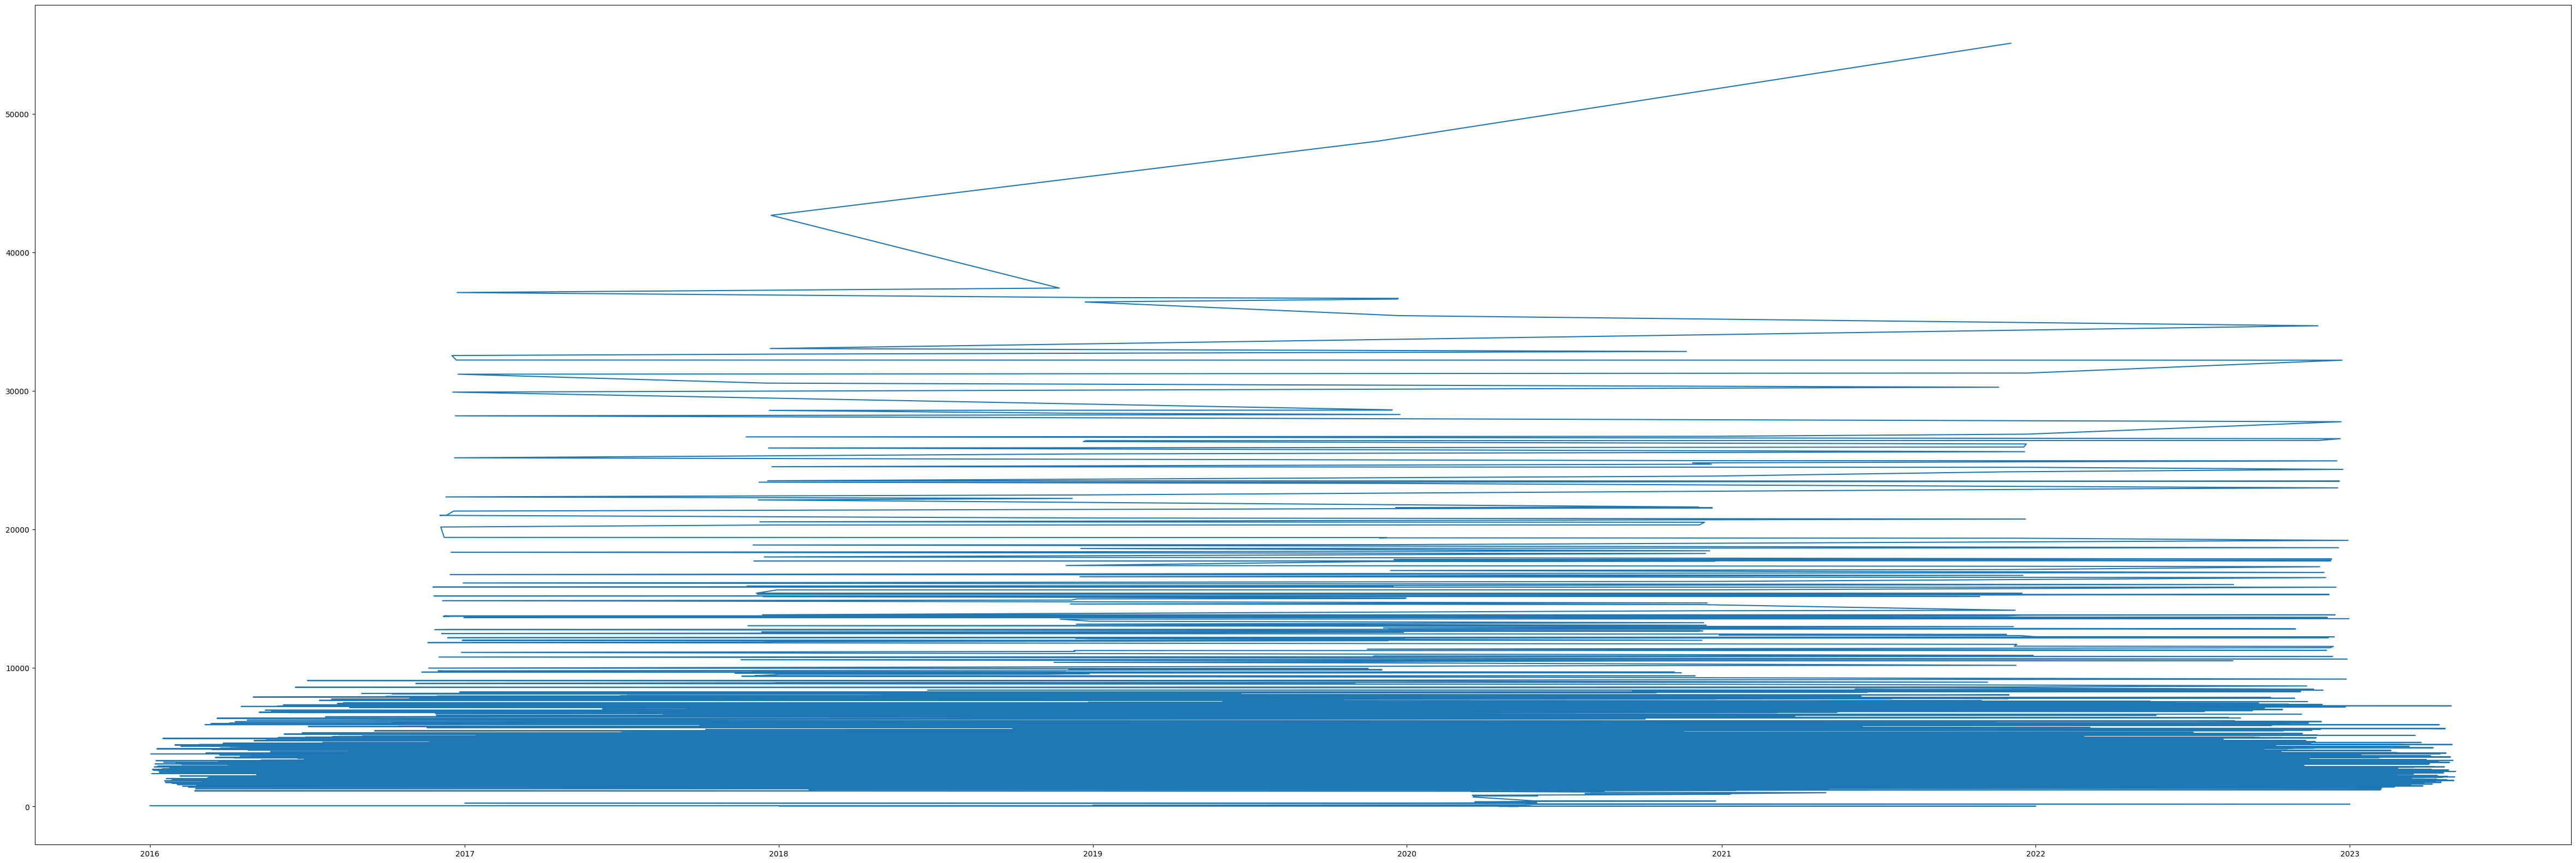

In [25]:
plt.figure(figsize=(60, 20))
plt.plot(counts)